In [1]:
from src.model import Model
from src.activation import CrossEntropy, ReLU, Softmax, Sigmoid
from src.optimizer import SGDOptimizer
from src.trainer import Trainer
from src.utils import plot_history, predictOne, predictTwo

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import balanced_accuracy_score

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MultiLabel(Dataset):
    def __init__(self, x, y=None):
        self._x = x
        self._y = y.squeeze() if y is not None else None

        if y is not None:
            self._nlabels = np.unique(y).size

    def __len__(self):
        return self._x.shape[0]

    def __getitem__(self, idx):
        if self._y is None:
            return self._x[idx]

        _y = [0] * self._nlabels
        _y[self._y[idx]] = 1
        return self._x[idx], torch.Tensor(_y)


In [3]:
x, y = datasets.make_blobs(n_samples=2500, n_features=2)
x_tmp, x_test, y_tmp, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_tmp, y_tmp, test_size=0.1)

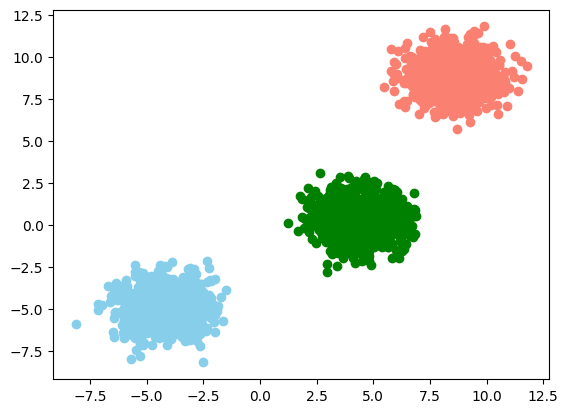

In [4]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='skyblue')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='salmon')
plt.scatter(x[y == 2, 0], x[y == 2, 1], color='green')
plt.show()


In [5]:
train_set = MultiLabel(x_train, y_train)
val_set = MultiLabel(x_val, y_val)
test_set = MultiLabel(x_test, y_test)

train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = DataLoader(val_set, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=16, shuffle=True)


100%|██████████| 256/256 [00:16<00:00, 15.17it/s, train_loss=0.24, val_loss=0.226] 


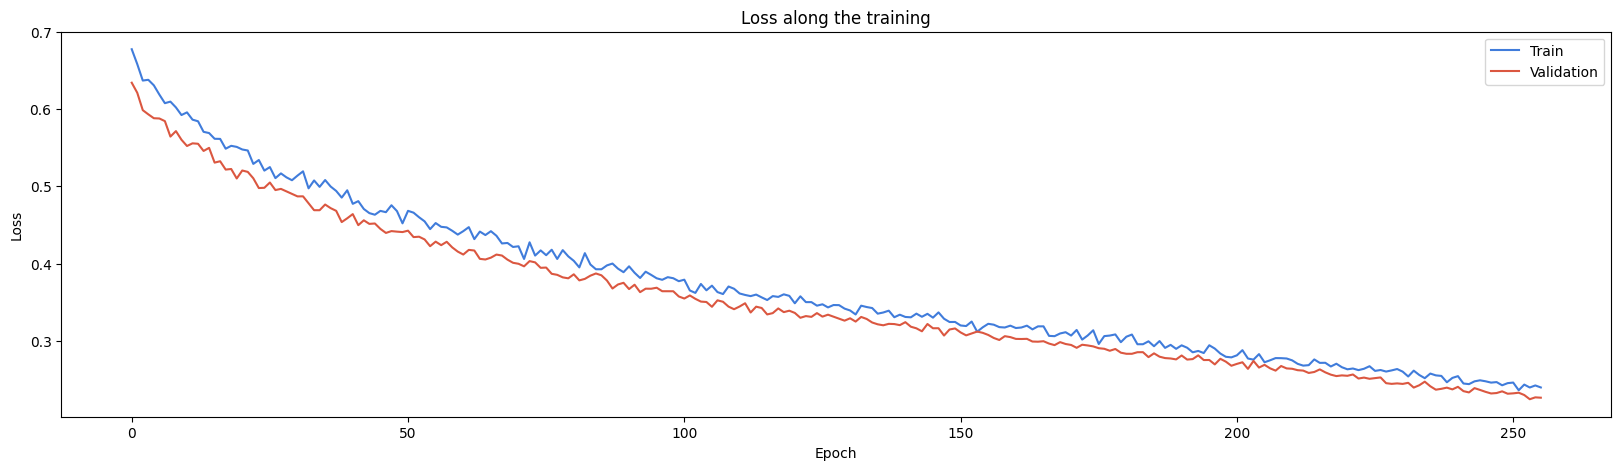

In [6]:
model = Model(
    layers_dims=[2, 64, 16, 8, 3],
    activation_funcs=[ReLU(), ReLU(), ReLU(), Sigmoid()],
    initialization_method="glorot"
)
opt = SGDOptimizer(model, lr=1e-3)
trainer = Trainer(model, opt, CrossEntropy())
history = trainer.train(256, train_loader, val_loader)
plot_history(history)

In [7]:
Ytrain_real, Ytrain_pred = predictTwo(model, train_loader)
Yval_real, Yval_pred = predictTwo(model, val_loader)
Ytest_real, Ytest_pred = predictTwo(model, test_loader)

print("train acc balanced:", balanced_accuracy_score(Ytrain_real, Ytrain_pred))
print("val acc balanced:", balanced_accuracy_score(Yval_real, Yval_pred))
print("test acc balanced:", balanced_accuracy_score(Ytest_real, Ytest_pred))

train acc balanced: 0.9932998324958123
val acc balanced: 0.9946236559139785
test acc balanced: 0.9885057471264368
